# Exploratory Data Analysis of Players Teams dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

players_teams = pd.read_csv('basketballPlayoffs/players_teams.csv', delimiter=",")
players = pd.read_csv('basketballPlayoffs/players.csv', delimiter=",")
awards = pd.read_csv('basketballPlayoffs/awards_players.csv', delimiter=",")

#players_teams = pd.merge(players, players_teams, left_on='playerID', right_on='playerID', how='inner')

players_teams.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26,23,846,343,43,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,WNBA,27,27,805,314,45,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,WNBA,30,25,792,318,44,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,WNBA,22,11,462,146,17,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,WNBA,31,31,777,304,29,...,0,0,0,0,0,0,0,0,0,0


In [2]:
players.head()

,playerID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00


## Players

In [3]:
def calculate_age(date_str):
    if (date_str == 0) or (date_str == "0000-00-00"): return
    
    date_of_birth = datetime.strptime(str(date_str), "%Y-%m-%d")
    current_date = datetime.now()
    age_timedelta = current_date - date_of_birth
    age_years = age_timedelta.days // 365  # This is a simple approximation
    return int(age_years)

players['birthDate'].fillna(0, inplace=True)
# Apply the function to the "date_of_birth" column and create a new "age" column
players['birthDate'] = players['birthDate'].apply(calculate_age)
players.rename(columns={'birthDate': 'age'}, inplace=True)
players.drop('deathDate', axis=1, inplace=True)

In [4]:
for column in players.columns:
    unique_values = players[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the playerID column are: 893
------------
Number of different values in the pos column are: 8
------------
Number of different values in the firstseason column are: 1
------------
Number of different values in the lastseason column are: 1
------------
Number of different values in the height column are: 21
------------
Number of different values in the weight column are: 105
------------
Number of different values in the college column are: 161
------------
Number of different values in the collegeOther column are: 12
------------
Number of different values in the age column are: 35
------------


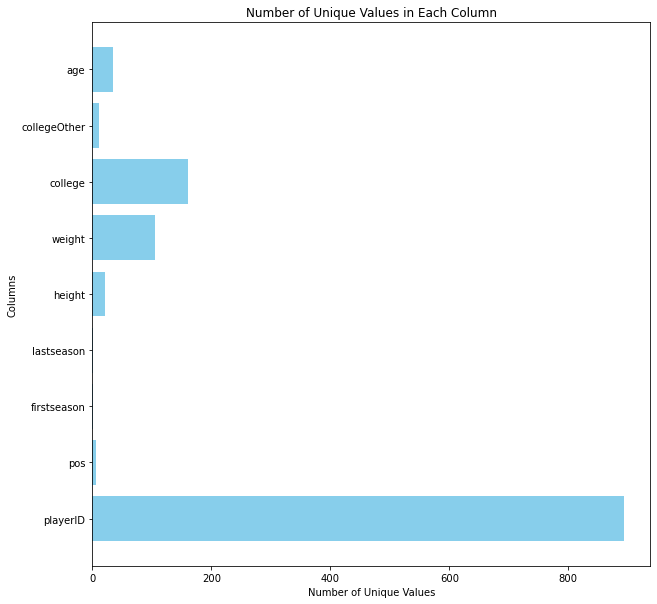

In [5]:
columns = []
value_counts = []

for column in players.columns:
    unique_values = players[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

First and last season features are all the same value (0), so we can delete that feature.

In [6]:
players.drop(columns=['firstseason', 'lastseason'], inplace=True)

## Players Teams

In [7]:
for column in players_teams.columns:
    unique_values = players_teams[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the playerID column are: 555
------------
Number of different values in the year column are: 10
------------
Number of different values in the stint column are: 4
------------
Number of different values in the tmID column are: 20
------------
Number of different values in the lgID column are: 1
------------
Number of different values in the GP column are: 34
------------
Number of different values in the GS column are: 35
------------
Number of different values in the minutes column are: 899
------------
Number of different values in the points column are: 530
------------
Number of different values in the oRebounds column are: 111
------------
Number of different values in the dRebounds column are: 203
------------
Number of different values in the rebounds column are: 270
------------
Number of different values in the assists column are: 174
------------
Number of different values in the steals column are: 87
------------
Number of different values in th

LeagueID there is just one value so we can erase that column. 

In [8]:
players_teams = players_teams.drop('lgID', axis=1)

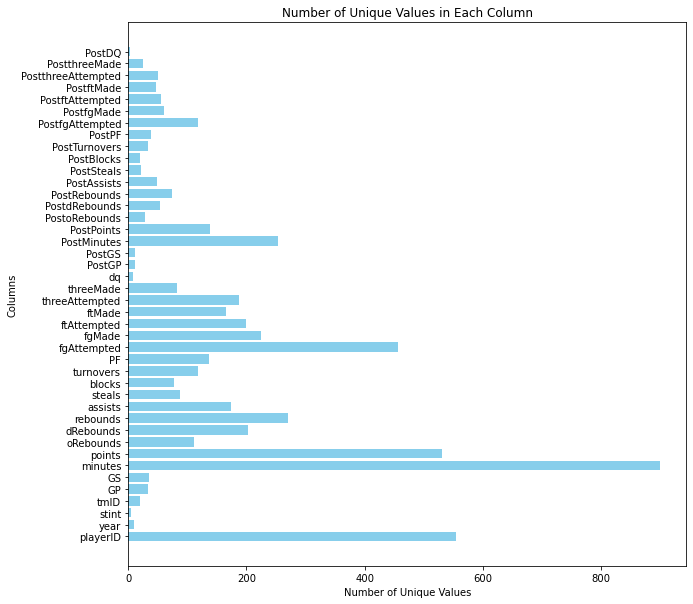

In [9]:
columns = []
value_counts = []

for column in players_teams.columns:
    unique_values = players_teams[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

Feature analysis and types and also check for null values existance, not much as can be seen.

In [10]:
players_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playerID            1876 non-null   object
 1   year                1876 non-null   int64 
 2   stint               1876 non-null   int64 
 3   tmID                1876 non-null   object
 4   GP                  1876 non-null   int64 
 5   GS                  1876 non-null   int64 
 6   minutes             1876 non-null   int64 
 7   points              1876 non-null   int64 
 8   oRebounds           1876 non-null   int64 
 9   dRebounds           1876 non-null   int64 
 10  rebounds            1876 non-null   int64 
 11  assists             1876 non-null   int64 
 12  steals              1876 non-null   int64 
 13  blocks              1876 non-null   int64 
 14  turnovers           1876 non-null   int64 
 15  PF                  1876 non-null   int64 
 16  fgAttempted         1876

In [11]:
# highest and lowest value per feature to calculate rating (0-100)
pointsPerGameMax = 0
pointsPerGameMin = 999

assistPerGameMax = 0
assistPerGameMin = 999

reboundsPerGameMax = 0
reboundsPerGameMin = 999

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

stealsPerGameMax = 0
stealsPerGameMin = 999

blocksPerGameMax = 0
blocksPerGameMin = 999

turnoversPerGameMax = 0
turnoversPerGameMin = 999

assistToTurnoverRatioMax = 0
assistToTurnoverRatioMin = 999

minutesMax = 0
minutesMin = 999

# percentage
startsMax = 0
startsMin = 1

threePointPercentageMax = 0
threePointPercentageMin = 1

freeThrowPercentageMax = 0
freeThrowPercentageMin = 1

fieldGoalPercentageMax = 0
fieldGoalPercentageMin = 1

trueShootingPercentageMax = 0
trueShootingPercentageMin = 1

personalFoulsPerGameMax = 0
personalFoulsPerGameMin = 999

dqPerGameMax = 0
dqPerGameMin = 999

for index, row in players_teams.iterrows(): 
    if row['GP'] == 0:
        pointsPerGameMin = 0
        players_teams.at[index, 'pointsPerGame'] = 0
    else: 
        if ( row['points'] / row['GP'] ) > pointsPerGameMax:
            pointsPerGameMax = ( row['points'] / row['GP'] )
        if ( row['points'] / row['GP'] ) < pointsPerGameMin:
            pointsPerGameMin = ( row['points'] / row['GP'] )

        players_teams.at[index, 'pointsPerGame'] = ( row['points'] / row['GP'] )

    
    if row['GP'] == 0:
        assistPerGameMin = 0
        players_teams.at[index, 'assistPerGame'] = 0
    else: 
        if ( row['assists'] / row['GP'] ) > assistPerGameMax:
            assistPerGameMax = ( row['assists'] / row['GP'] )
        if ( row['assists'] / row['GP'] ) < assistPerGameMin:
            assistPerGameMin = ( row['assists'] / row['GP'] )

        players_teams.at[index, 'assistPerGame'] = ( row['assists'] / row['GP'] )

    if row['GP'] == 0:
        reboundsPerGameMin = 0
        players_teams.at[index, 'reboundsPerGame'] = 0
    else: 
        if ( row['rebounds'] / row['GP'] ) > reboundsPerGameMax:
            reboundsPerGameMax = ( row['rebounds'] / row['GP'] )
        if ( row['rebounds'] / row['GP'] ) < reboundsPerGameMin:
            reboundsPerGameMin = ( row['rebounds'] / row['GP'] )

        players_teams.at[index, 'reboundsPerGame'] = ( row['rebounds'] / row['GP'] )

    if row['GP'] == 0:
        defensiveReboundsPerGameMin = 0
        players_teams.at[index, 'defensiveReboundsPerGame'] = 0
    else: 
        if ( row['dRebounds'] / row['GP'] ) > defensiveReboundsPerGameMax:
            defensiveReboundsPerGameMax = ( row['dRebounds'] / row['GP'] )
        if ( row['dRebounds'] / row['GP'] ) < defensiveReboundsPerGameMin:
            defensiveReboundsPerGameMin = ( row['dRebounds'] / row['GP'] )

        players_teams.at[index, 'defensiveReboundsPerGame'] = ( row['dRebounds'] / row['GP'] )

    if row['GP'] == 0:
        stealsPerGameMin = 0
        players_teams.at[index, 'stealsPerGame'] = 0
    else: 
        if ( row['steals'] / row['GP'] ) > stealsPerGameMax:
            stealsPerGameMax = ( row['steals'] / row['GP'] )
        if ( row['steals'] / row['GP'] ) < stealsPerGameMin:
            stealsPerGameMin = ( row['steals'] / row['GP'] )

        players_teams.at[index, 'stealsPerGame'] = ( row['steals'] / row['GP'] )

    if row['GP'] == 0:
        blocksPerGameMin = 0
        players_teams.at[index, 'blocksPerGame'] = 0
    else: 
        if ( row['blocks'] / row['GP'] ) > blocksPerGameMax:
            blocksPerGameMax = ( row['blocks'] / row['GP'] )
        if ( row['blocks'] / row['GP'] ) < blocksPerGameMin:
            blocksPerGameMin = ( row['blocks'] / row['GP'] )

        players_teams.at[index, 'blocksPerGame'] = ( row['blocks'] / row['GP'] )

    if row['GP'] == 0:
        turnoversPerGameMin = 0
        players_teams.at[index, 'turnoversPerGame'] = 0
    else: 
        if ( row['turnovers'] / row['GP'] ) > turnoversPerGameMax:
            turnoversPerGameMax = ( row['turnovers'] / row['GP'] )
        if ( row['turnovers'] / row['GP'] ) < turnoversPerGameMin:
            turnoversPerGameMin = ( row['turnovers'] / row['GP'] )

        players_teams.at[index, 'turnoversPerGame'] = ( row['turnovers'] / row['GP'] )

    if row['turnovers'] == 0 and row['assists'] == 0:
        assistToTurnoverRatioMin = 0
        players_teams.at[index, 'assistToTurnoverRatio'] = 0

    elif row['turnovers'] == 0 and row['assists'] > 0:
        if(assistToTurnoverRatioMax < row['assists']): 
            assistToTurnoverRatioMax = row['assists']

        players_teams.at[index, 'assistToTurnoverRatio'] = row['assists']
    else: 
        if ( row['assists'] / row['turnovers'] ) > assistToTurnoverRatioMax:
            assistToTurnoverRatioMax = ( row['assists'] / row['turnovers'] )
        if ( row['assists'] / row['turnovers'] ) < assistToTurnoverRatioMin:
            assistToTurnoverRatioMin = ( row['assists'] / row['turnovers'] )

        players_teams.at[index, 'assistToTurnoverRatio'] = ( row['assists'] / row['turnovers'] )

    if ( row['minutes'] ) > minutesMax:
        minutesMax = ( row['minutes'] )
    if ( row['minutes'] ) < minutesMin:
        minutesMin = ( row['minutes'] )

    if row['GP'] == 0:
        startsMin = 0
    else: 
        if ( row['GS'] / row['GP'] ) > startsMax:
            startsMax = ( row['GS'] / row['GP'] )
        if ( row['GS'] / row['GP'] ) < startsMin:
            startsMin = ( row['GS'] / row['GP'] )
    
    if row['threeAttempted'] == 0:
        threePointPercentageMin = 0
        players_teams.at[index, 'threePointPercentage'] = 0
    else: 
        if ( row['threeMade'] / row['threeAttempted'] ) > threePointPercentageMax:
            threePointPercentageMax = ( row['threeMade'] / row['threeAttempted'] )
        if ( row['threeMade'] / row['threeAttempted'] ) < threePointPercentageMin:
            threePointPercentageMin = ( row['threeMade'] / row['threeAttempted'] )

        players_teams.at[index, 'threePointPercentage'] = ( row['threeMade'] / row['threeAttempted'] )

    if row['ftAttempted'] == 0:
        freeThrowPercentageMin = 0
        players_teams.at[index, 'freeThrowPercentage'] = 0
    else: 
        if ( row['ftMade'] / row['ftAttempted'] ) > freeThrowPercentageMax:
            freeThrowPercentageMax = ( row['ftMade'] / row['ftAttempted'] )
        if ( row['ftMade'] / row['ftAttempted'] ) < freeThrowPercentageMin:
            freeThrowPercentageMin = ( row['ftMade'] / row['ftAttempted'] )

        players_teams.at[index, 'freeThrowPercentage'] = ( row['ftMade'] / row['ftAttempted'] )

    if row['fgAttempted'] == 0:
        fieldGoalPercentageMin = 0
        players_teams.at[index, 'fieldGoalPercentage'] = 0
    else: 
        if ( row['fgMade'] / row['fgAttempted'] ) > fieldGoalPercentageMax:
            fieldGoalPercentageMax = ( row['fgMade'] / row['fgAttempted'] )
        if ( row['fgMade'] / row['fgAttempted'] ) < fieldGoalPercentageMin:
            fieldGoalPercentageMin = ( row['fgMade'] / row['fgAttempted'] )

        players_teams.at[index, 'fieldGoalPercentage'] = ( row['fgMade'] / row['fgAttempted'] )

    # True Shooting Percentage
    if row['points'] == 0:
        players_teams.at[index, 'trueShootingPercentage'] = 0
        trueShootingPercentageMin = 0
    else:
        if ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) ) > trueShootingPercentageMax:
            trueShootingPercentageMax = ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) )
        if ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) ) < trueShootingPercentageMin:
            trueShootingPercentageMin = ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) )

        players_teams.at[index, 'trueShootingPercentage'] = row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted']))

    # Personal Fouls Per Game
    if row['GP'] == 0:
        players_teams.at[index, 'personalFoulsPerGame'] = 0
        personalFoulsPerGameMin = 0
    else:
        if ( row['PF'] / row['GP'] ) > personalFoulsPerGameMax:
            personalFoulsPerGameMax = ( row['PF'] / row['GP'] )
        if ( row['PF'] / row['GP'] ) < personalFoulsPerGameMin:
            personalFoulsPerGameMin = ( row['PF'] / row['GP'] )

        players_teams.at[index, 'personalFoulsPerGame'] = row['PF'] / row['GP']

    if row['GP'] == 0:
        players_teams.at[index, 'dqPerGame'] = 0
        dqPerGameMin = 0
    else:
        if( row['dq'] / row['GP'] ) > dqPerGameMax:
            dqPerGameMax = ( row['dq'] / row['GP'] )
        if( row['dq'] / row['GP'] ) < dqPerGameMin:
            dqPerGameMin = ( row['dq'] / row['GP'] )

        players_teams.at[index, 'dqPerGame'] = row['dq'] / row['GP']

# players_teams.to_csv('test.csv', index=False)

print("pointsPerGameMax: ", pointsPerGameMax)
print("pointsPerGameMin: ", pointsPerGameMin)
print("assistPerGameMax: ", assistPerGameMax)
print("assistPerGameMin: ", assistPerGameMin)
print("reboundsPerGameMax: ", reboundsPerGameMax)
print("reboundsPerGameMin: ", reboundsPerGameMin)
print("defensiveReboundsPerGameMax: ", defensiveReboundsPerGameMax)
print("defensiveReboundsPerGameMin: ", defensiveReboundsPerGameMin)
print("stealsPerGameMax: ", stealsPerGameMax)
print("stealsPerGameMin: ", stealsPerGameMin)
print("blocksPerGameMax: ", blocksPerGameMax)
print("blocksPerGameMin: ", blocksPerGameMin)
print("turnoversPerGameMax: ", turnoversPerGameMax)
print("turnoversPerGameMin: ", turnoversPerGameMin)
print("assistToTurnoverRatioMax: ", assistToTurnoverRatioMax)
print("assistToTurnoverRatioMin: ", assistToTurnoverRatioMin)
print("minutesMax: ", minutesMax)
print("minutesMin: ", minutesMin)
print("startsMax: ", startsMax)
print("startsMin: ", startsMin)
print("threePointPercentageMax: ", threePointPercentageMax)
print("threePointPercentageMin: ", threePointPercentageMin)
print("freeThrowPercentageMax: ", freeThrowPercentageMax)
print("freeThrowPercentageMin: ", freeThrowPercentageMin)
print("fieldGoalPercentageMax: ", fieldGoalPercentageMax)
print("fieldGoalPercentageMin: ", fieldGoalPercentageMin)
print("trueShootingPercentageMax: ", trueShootingPercentageMax)
print("trueShootingPercentageMin: ", trueShootingPercentageMin)
print("personalFoulsPerGameMax: ", personalFoulsPerGameMax)
print("personalFoulsPerGameMin: ", personalFoulsPerGameMin)
print("dqPerGameMax: ", dqPerGameMax)
print("dqPerGameMin: ", dqPerGameMin)

pointsPerGameMax:  25.294117647058822
pointsPerGameMin:  0.0
assistPerGameMax:  8.0
assistPerGameMin:  0.0
reboundsPerGameMax:  11.6
reboundsPerGameMin:  0.0
defensiveReboundsPerGameMax:  8.9
defensiveReboundsPerGameMin:  0.0
stealsPerGameMax:  5.0
stealsPerGameMin:  0.0
blocksPerGameMax:  3.566666666666667
blocksPerGameMin:  0.0
turnoversPerGameMax:  5.2
turnoversPerGameMin:  0.0
assistToTurnoverRatioMax:  5.5
assistToTurnoverRatioMin:  0
minutesMax:  1234
minutesMin:  0
startsMax:  1.0
startsMin:  0.0
threePointPercentageMax:  1.0
threePointPercentageMin:  0
freeThrowPercentageMax:  1.0
freeThrowPercentageMin:  0
fieldGoalPercentageMax:  1.0
fieldGoalPercentageMin:  0
trueShootingPercentageMax:  0.9881422924901185
trueShootingPercentageMin:  0
personalFoulsPerGameMax:  4.6
personalFoulsPerGameMin:  0.0
dqPerGameMax:  0.5
dqPerGameMin:  0.0


In [12]:
def forward_power_ranking(player): 

    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['threeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['threeMade'] / player['threeAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['GP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        assistsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        assistsPerGame = (((player['assists'] / player['GP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100
        dqPerGame = (((player['dq'] / player['GP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, threePointPercentage, reboundsPerGame, assistsPerGame, stealsPerGame, blocksPerGame, minutes, starts, dqPerGame]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame: 
            powerRankingAcummulator -= feature * averageFeatureWeight

        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [13]:
def guard_power_ranking(player): 
    
    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['threeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['threeMade'] / player['threeAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['turnovers'] == 0):
        assistToTurnoverRatio = player['assists']
    else:
        assistToTurnoverRatio = (((player['assists'] / player['turnovers']) - assistToTurnoverRatioMin) / (assistToTurnoverRatioMax - assistToTurnoverRatioMin)) * 100

    if(player['GP'] == 0):
        pointsPerGame = 0
        assistsPerGame = 0
        reboundsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        assistsPerGame = (((player['assists'] / player['GP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100
        dqPerGame = (((player['dq'] / player['GP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, threePointPercentage, freeThrowPercentage, assistToTurnoverRatio, assistsPerGame, reboundsPerGame, stealsPerGame, blocksPerGame, minutes, starts, dqPerGame]
    
    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame:
            powerRankingAcummulator -= feature * averageFeatureWeight
            
        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [14]:
def center_power_ranking(player): 

    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['GP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        defensiveReboundsPerGame = 0
        blocksPerGame = 0
        stealsPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        defensiveReboundsPerGame = (((player['dRebounds'] / player['GP']) - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100
        dqPerGame = (((player['dq'] / player['GP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, reboundsPerGame, defensiveReboundsPerGame, blocksPerGame, stealsPerGame, minutes, starts, dqPerGame]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame:
            powerRankingAcummulator -= feature * averageFeatureWeight
            
        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [15]:
def calculate_PER(player):
    fgm = player['fgMade']
    steals = player['steals']
    threeptm = player['threeMade']
    ftm = player['ftMade']
    blocks = player['blocks']
    offReb = player['oRebounds']
    assists = player['assists']
    defReb = player['dRebounds']
    foul = player['PF']
    ftmiss = player['ftAttempted'] - player['ftMade']
    fgmiss = player['fgAttempted'] - player['fgMade']
    turnovers = player['turnovers']
    minutes = player['minutes']

    if(minutes == 0):
        return 0

    formulaPER = (fgm * 85.910 + steals * 53.897 + threeptm * 51.757 + 
                  ftm * 46.845 + blocks * 39.190 + offReb * 39.190 + 
                  assists * 34.677 + defReb * 14.707 - foul * 17.174 -
                  ftmiss * 20.091 - fgmiss * 39.190 - turnovers * 53.897) * (1 / minutes)
    
    return formulaPER


In [16]:
def add_new_relevant_statistics(player): 
    trueShootingPercentage = player['points'] / (2 * (player['fgAttempted'] + 0.44 * player['ftAttempted']))
    usageRate = 100 * (player['fgAttempted'] + 0.44 * player['ftAttempted'] + player['turnovers']) / (player['o_fga'] + 0.44 * player['o_fta'] + player['o_to'])

In [17]:
merge_players_players_teams = pd.merge(players, players_teams, how='inner', on='playerID')

# 'G' , 'F', 'C'

for index, player in merge_players_players_teams.iterrows(): 
    if 'G' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = guard_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)
    elif 'F' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = forward_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)
    elif 'C' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = center_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)

merge_players_players_teams = merge_players_players_teams.drop(columns=['PF', 'GP', 'GS', 'minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade', 'dq'])
merge_players_players_teams = merge_players_players_teams.drop(columns=['pointsPerGame','assistPerGame','reboundsPerGame','defensiveReboundsPerGame','stealsPerGame','blocksPerGame','turnoversPerGame','assistToTurnoverRatio','threePointPercentage','freeThrowPercentage','fieldGoalPercentage','trueShootingPercentage','personalFoulsPerGame','dqPerGame'])
#merge_players_players_teams.to_csv('players_teams.csv', index=False)

print(players_teams.head)

<bound method NDFrame.head of         playerID  year  stint tmID  GP  GS  minutes  points  oRebounds  \
0     abrossv01w     2      0  MIN  26  23      846     343         43   
1     abrossv01w     3      0  MIN  27  27      805     314         45   
2     abrossv01w     4      0  MIN  30  25      792     318         44   
3     abrossv01w     5      0  MIN  22  11      462     146         17   
4     abrossv01w     6      0  MIN  31  31      777     304         29   
...          ...   ...    ...  ...  ..  ..      ...     ...        ...   
1871  zakalok01w     3      2  PHO   5   0       37       6          0   
1872   zarafr01w     6      0  SEA  34   4      413      90         11   
1873  zellosh01w    10      0  DET  34   4      802     406         25   
1874  zirkozu01w     4      0  WAS   6   0       30      11          0   
1875   zollsh01w     9      0  MIN   6   0       30      10          1   

      dRebounds  ...  stealsPerGame  blocksPerGame  turnoversPerGame  \
0        

In [18]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playerPowerRanking']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

In [19]:
temp = merge_players_players_teams.copy()

for column in temp.columns:
    if temp[column].dtype == 'object':
        temp[column] = temp[column].astype('category').cat.codes

temp.describe()

#temp.to_csv('hsdhgdhd.csv', index=False)

,playerID,pos,height,weight,college,collegeOther,age,year,stint,tmID,...,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,playerPowerRanking,PER
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,280.761194,3.254797,71.736141,166.997868,57.207889,-0.972281,45.347548,5.326226,0.113539,10.033049,...,3.735075,12.282516,5.149254,3.672708,2.822495,2.924307,1.019723,0.026652,28.496549,9.004789
std,155.308953,1.944593,5.523399,24.624259,37.658953,0.313738,4.935931,2.905475,0.422574,5.406266,...,6.697874,24.313379,10.726421,8.463917,6.723170,7.751034,2.992637,0.170751,14.667227,7.239145
min,0.000000,0.000000,9.000000,0.000000,-1.000000,-1.000000,35.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.461265,-107.794000
25%,143.000000,2.000000,69.000000,150.000000,23.000000,-1.000000,41.000000,3.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.179834,5.994538
50%,284.000000,3.000000,72.000000,165.000000,58.000000,-1.000000,45.000000,5.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.438446,9.287803
75%,412.000000,5.000000,75.000000,183.000000,95.000000,-1.000000,48.000000,8.000000,0.000000,15.000000,...,5.000000,15.000000,6.000000,4.000000,2.000000,1.000000,0.000000,0.000000,41.906247,12.769050
max,554.000000,6.000000,80.000000,253.000000,124.000000,4.000000,65.000000,10.000000,3.000000,19.000000,...,43.000000,188.000000,82.000000,68.000000,62.000000,85.000000,32.000000,2.000000,66.504158,62.175667


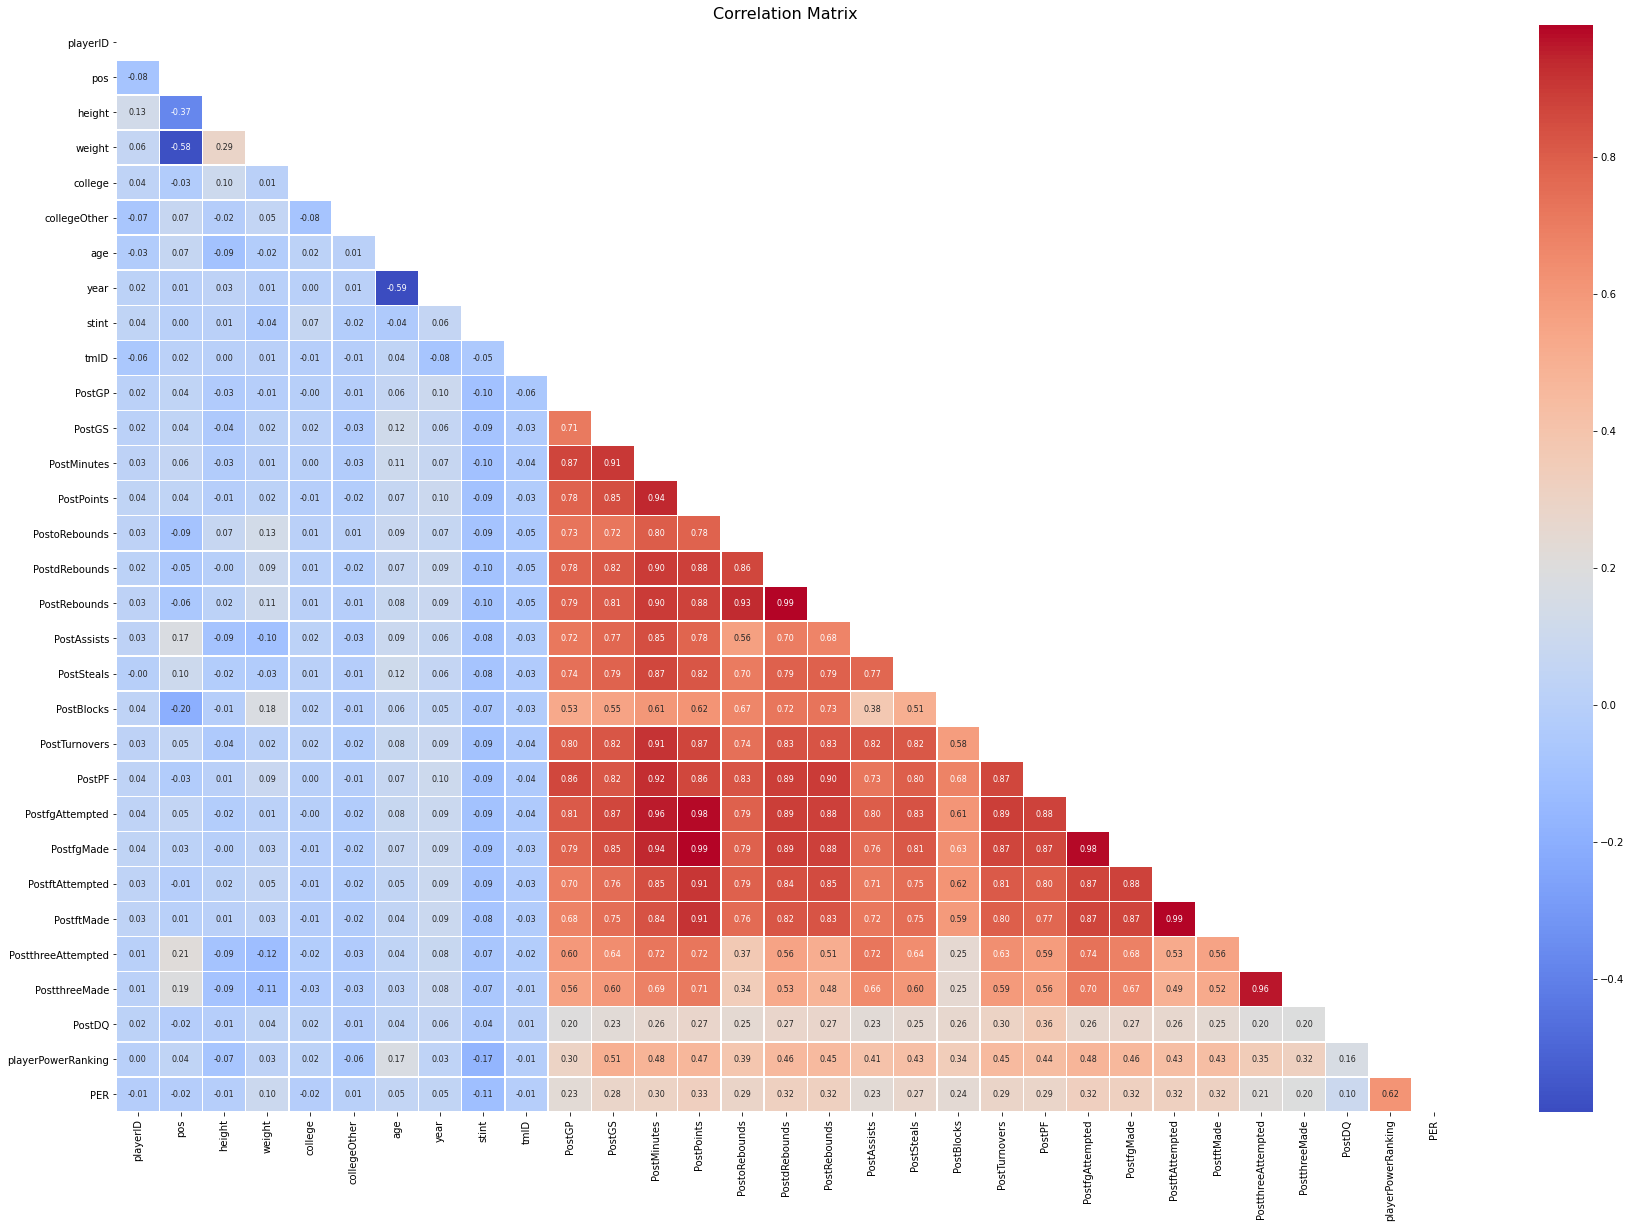

{'playerID': 0.0017407573424106373,
 'pos': 0.04395862547682112,
 'height': -0.07460144972518805,
 'weight': 0.03073244198376407,
 'college': 0.022693003462659928,
 'collegeOther': -0.06056423250270007,
 'age': 0.17034178050919835,
 'year': 0.03255910353193643,
 'stint': -0.17224739122380459,
 'tmID': -0.010732987827324882,
 'PostGP': 0.3000199252702728,
 'PostGS': 0.5063519737560359,
 'PostMinutes': 0.4835601406613073,
 'PostPoints': 0.4663695491367891,
 'PostoRebounds': 0.3859414592663982,
 'PostdRebounds': 0.45838062623197884,
 'PostRebounds': 0.4490343552835364,
 'PostAssists': 0.40766466382145317,
 'PostSteals': 0.4275739971481783,
 'PostBlocks': 0.3434149842780935,
 'PostTurnovers': 0.45281948294775065,
 'PostPF': 0.43638332480355035,
 'PostfgAttempted': 0.4770313268319064,
 'PostfgMade': 0.46382654333745904,
 'PostftAttempted': 0.42901519682037553,
 'PostftMade': 0.4285840481503909,
 'PostthreeAttempted': 0.3488203414550617,
 'PostthreeMade': 0.31752825678265073,
 'PostDQ': 0.16

Correlation between target and playerID: 0.0017407573424106373
Correlation between target and pos: 0.04395862547682112
Correlation between target and height: -0.07460144972518805
Correlation between target and weight: 0.03073244198376407
Correlation between target and college: 0.022693003462659928
Correlation between target and collegeOther: -0.06056423250270007
Correlation between target and age: 0.17034178050919835
Correlation between target and year: 0.03255910353193643
Correlation between target and stint: -0.17224739122380459
Correlation between target and tmID: -0.010732987827324882
Correlation between target and PostGP: 0.3000199252702728
Correlation between target and PostGS: 0.5063519737560359
Correlation between target and PostMinutes: 0.4835601406613073
Correlation between target and PostPoints: 0.4663695491367891
Correlation between target and PostoRebounds: 0.3859414592663982
Correlation between target and PostdRebounds: 0.45838062623197884
Correlation between target and P

In [20]:
correlation_matrix(temp)

## Players Playoffs Performance

In [21]:
# highest and lowest value per feature to calculate rating (0-100)
pointsPerGameMax = 0
pointsPerGameMin = 999

assistPerGameMax = 0
assistPerGameMin = 999

reboundsPerGameMax = 0
reboundsPerGameMin = 999

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

stealsPerGameMax = 0
stealsPerGameMin = 999

blocksPerGameMax = 0
blocksPerGameMin = 999

turnoversPerGameMax = 0
turnoversPerGameMin = 999

assistToTurnoverRatioMax = 0
assistToTurnoverRatioMin = 999

minutesMax = 0
minutesMin = 999

# percentage
startsMax = 0
startsMin = 1

threePointPercentageMax = 0
threePointPercentageMin = 1

freeThrowPercentageMax = 0
freeThrowPercentageMin = 1

fieldGoalPercentageMax = 0
fieldGoalPercentageMin = 1

trueShootingPercentageMax = 0
trueShootingPercentageMin = 1

personalFoulsPerGameMax = 0
personalFoulsPerGameMin = 999

dqPerGameMax = 0
dqPerGameMin = 999

for index, row in merge_players_players_teams.iterrows(): 
    if row['PostGP'] == 0:
        pointsPerGameMin = 0
        merge_players_players_teams.at[index, 'PostPointsPerGame'] = 0
    else: 
        if ( row['PostPoints'] / row['PostGP'] ) > pointsPerGameMax:
            pointsPerGameMax = ( row['PostPoints'] / row['PostGP'] )
        if ( row['PostPoints'] / row['PostGP'] ) < pointsPerGameMin:
            pointsPerGameMin = ( row['PostPoints'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostPointsPerGame'] = ( row['PostPoints'] / row['PostGP'] )

    
    if row['PostGP'] == 0:
        assistPerGameMin = 0
        merge_players_players_teams.at[index, 'PostAssistPerGame'] = 0
    else: 
        if ( row['PostAssists'] / row['PostGP'] ) > assistPerGameMax:
            assistPerGameMax = ( row['PostAssists'] / row['PostGP'] )
        if ( row['PostAssists'] / row['PostGP'] ) < assistPerGameMin:
            assistPerGameMin = ( row['PostAssists'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostAssistPerGame'] = ( row['PostAssists'] / row['PostGP'] )

    if row['PostGP'] == 0:
        reboundsPerGameMin = 0
        merge_players_players_teams.at[index, 'PostReboundsPerGame'] = 0
    else: 
        if ( row['PostRebounds'] / row['PostGP'] ) > reboundsPerGameMax:
            reboundsPerGameMax = ( row['PostRebounds'] / row['PostGP'] )
        if ( row['PostRebounds'] / row['PostGP'] ) < reboundsPerGameMin:
            reboundsPerGameMin = ( row['PostRebounds'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostReboundsPerGame'] = ( row['PostRebounds'] / row['PostGP'] )

    if row['PostGP'] == 0:
        defensiveReboundsPerGameMin = 0
        merge_players_players_teams.at[index, 'PostDefensiveReboundsPerGame'] = 0
    else: 
        if ( row['PostdRebounds'] / row['PostGP'] ) > defensiveReboundsPerGameMax:
            defensiveReboundsPerGameMax = ( row['PostdRebounds'] / row['PostGP'] )
        if ( row['PostdRebounds'] / row['PostGP'] ) < defensiveReboundsPerGameMin:
            defensiveReboundsPerGameMin = ( row['PostdRebounds'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostdefensiveReboundsPerGame'] = ( row['PostdRebounds'] / row['PostGP'] )

    if row['PostGP'] == 0:
        stealsPerGameMin = 0
        merge_players_players_teams.at[index, 'PostStealsPerGame'] = 0
    else: 
        if ( row['PostSteals'] / row['PostGP'] ) > stealsPerGameMax:
            stealsPerGameMax = ( row['PostSteals'] / row['PostGP'] )
        if ( row['PostSteals'] / row['PostGP'] ) < stealsPerGameMin:
            stealsPerGameMin = ( row['PostSteals'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostStealsPerGame'] = ( row['PostSteals'] / row['PostGP'] )

    if row['PostGP'] == 0:
        blocksPerGameMin = 0
        merge_players_players_teams.at[index, 'PostBlocksPerGame'] = 0
    else: 
        if ( row['PostBlocks'] / row['PostGP'] ) > blocksPerGameMax:
            blocksPerGameMax = ( row['PostBlocks'] / row['PostGP'] )
        if ( row['PostBlocks'] / row['PostGP'] ) < blocksPerGameMin:
            blocksPerGameMin = ( row['PostBlocks'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostBlocksPerGame'] = ( row['PostBlocks'] / row['PostGP'] )

    if row['PostGP'] == 0:
        turnoversPerGameMin = 0
        merge_players_players_teams.at[index, 'PostTurnoversPerGame'] = 0
    else: 
        if ( row['PostTurnovers'] / row['PostGP'] ) > turnoversPerGameMax:
            turnoversPerGameMax = ( row['PostTurnovers'] / row['PostGP'] )
        if ( row['PostTurnovers'] / row['PostGP'] ) < turnoversPerGameMin:
            turnoversPerGameMin = ( row['PostTurnovers'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostTurnoversPerGame'] = ( row['PostTurnovers'] / row['PostGP'] )

    if row['PostTurnovers'] == 0 and row['PostAssists'] == 0:
        assistToTurnoverRatioMin = 0
        merge_players_players_teams.at[index, 'PostAssistToTurnoverRatio'] = 0

    elif row['PostTurnovers'] == 0 and row['PostAssists'] > 0:
        if(assistToTurnoverRatioMax < row['PostAssists']): 
            assistToTurnoverRatioMax = row['PostAssists']

        merge_players_players_teams.at[index, 'PostAssistToTurnoverRatio'] = row['PostAssists']
    else: 
        if ( row['PostAssists'] / row['PostTurnovers'] ) > assistToTurnoverRatioMax:
            assistToTurnoverRatioMax = ( row['PostAssists'] / row['PostTurnovers'] )
        if ( row['PostAssists'] / row['PostTurnovers'] ) < assistToTurnoverRatioMin:
            assistToTurnoverRatioMin = ( row['PostAssists'] / row['PostTurnovers'] )

        merge_players_players_teams.at[index, 'PostAssistToTurnoverRatio'] = ( row['PostAssists'] / row['PostTurnovers'] )

    if ( row['PostMinutes'] ) > minutesMax:
        minutesMax = ( row['PostMinutes'] )
    if ( row['PostMinutes'] ) < minutesMin:
        minutesMin = ( row['PostMinutes'] )

    if row['PostGP'] == 0:
        startsMin = 0
    else: 
        if ( row['PostGS'] / row['PostGP'] ) > startsMax:
            startsMax = ( row['PostGS'] / row['PostGP'] )
        if ( row['PostGS'] / row['PostGP'] ) < startsMin:
            startsMin = ( row['PostGS'] / row['PostGP'] )
    
    if row['PostthreeAttempted'] == 0:
        threePointPercentageMin = 0
        merge_players_players_teams.at[index, 'PostthreePointPercentage'] = 0
    else: 
        if ( row['PostthreeMade'] / row['PostthreeAttempted'] ) > threePointPercentageMax:
            threePointPercentageMax = ( row['PostthreeMade'] / row['PostthreeAttempted'] )
        if ( row['PostthreeMade'] / row['PostthreeAttempted'] ) < threePointPercentageMin:
            threePointPercentageMin = ( row['PostthreeMade'] / row['PostthreeAttempted'] )

        merge_players_players_teams.at[index, 'PostthreePointPercentage'] = ( row['PostthreeMade'] / row['PostthreeAttempted'] )

    if row['PostftAttempted'] == 0:
        freeThrowPercentageMin = 0
        merge_players_players_teams.at[index, 'PostfreeThrowPercentage'] = 0
    else: 
        if ( row['PostftMade'] / row['PostftAttempted'] ) > freeThrowPercentageMax:
            freeThrowPercentageMax = ( row['PostftMade'] / row['PostftAttempted'] )
        if ( row['PostftMade'] / row['PostftAttempted'] ) < freeThrowPercentageMin:
            freeThrowPercentageMin = ( row['PostftMade'] / row['PostftAttempted'] )

        merge_players_players_teams.at[index, 'PostfreeThrowPercentage'] = ( row['PostftMade'] / row['PostftAttempted'] )

    if row['PostfgAttempted'] == 0:
        fieldGoalPercentageMin = 0
        merge_players_players_teams.at[index, 'PostfieldGoalPercentage'] = 0
    else: 
        if ( row['PostfgMade'] / row['PostfgAttempted'] ) > fieldGoalPercentageMax:
            fieldGoalPercentageMax = ( row['PostfgMade'] / row['PostfgAttempted'] )
        if ( row['PostfgMade'] / row['PostfgAttempted'] ) < fieldGoalPercentageMin:
            fieldGoalPercentageMin = ( row['PostfgMade'] / row['PostfgAttempted'] )

        merge_players_players_teams.at[index, 'PostfieldGoalPercentage'] = ( row['PostfgMade'] / row['PostfgAttempted'] )

    # True Shooting Percentage
    if row['PostPoints'] == 0:
        merge_players_players_teams.at[index, 'PosttrueShootingPercentage'] = 0
        trueShootingPercentageMin = 0
    else:
        if ( row['PostPoints'] / (2.3 * ((row['PostfgAttempted'] + row['PostthreeAttempted']) + 0.44 * row['PostftAttempted'])) ) > trueShootingPercentageMax:
            trueShootingPercentageMax = ( row['PostPoints'] / (2.3 * ((row['PostfgAttempted'] + row['PostthreeAttempted']) + 0.44 * row['PostftAttempted'])) )
        if ( row['PostPoints'] / (2.3 * ((row['PostfgAttempted'] + row['PostthreeAttempted']) + 0.44 * row['PostftAttempted'])) ) < trueShootingPercentageMin:
            trueShootingPercentageMin = ( row['PostPoints'] / (2.3 * ((row['PostfgAttempted'] + row['PostthreeAttempted']) + 0.44 * row['PostftAttempted'])) )

        merge_players_players_teams.at[index, 'PosttrueShootingPercentage'] = row['PostPoints'] / (2.3 * ((row['PostfgAttempted'] + row['PostthreeAttempted']) + 0.44 * row['PostftAttempted']))

    # Personal Fouls Per Game
    if row['PostGP'] == 0:
        merge_players_players_teams.at[index, 'PostpersonalFoulsPerGame'] = 0
        personalFoulsPerGameMin = 0
    else:
        if ( row['PostPF'] / row['PostGP'] ) > personalFoulsPerGameMax:
            personalFoulsPerGameMax = ( row['PostPF'] / row['PostGP'] )
        if ( row['PostPF'] / row['PostGP'] ) < personalFoulsPerGameMin:
            personalFoulsPerGameMin = ( row['PostPF'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostpersonalFoulsPerGame'] = row['PostPF'] / row['PostGP']

    if row['PostGP'] == 0:
        merge_players_players_teams.at[index, 'PostdqPerGame'] = 0
        dqPerGameMin = 0
    else:
        if( row['PostDQ'] / row['PostGP'] ) > dqPerGameMax:
            dqPerGameMax = ( row['PostDQ'] / row['PostGP'] )
        if( row['PostDQ'] / row['PostGP'] ) < dqPerGameMin:
            dqPerGameMin = ( row['PostDQ'] / row['PostGP'] )

        merge_players_players_teams.at[index, 'PostdqPerGame'] = row['PostDQ'] / row['PostGP']

#merge_players_players_teams.to_csv('test.csv', index=False)

print("pointsPerGameMax: ", pointsPerGameMax)
print("pointsPerGameMin: ", pointsPerGameMin)
print("assistPerGameMax: ", assistPerGameMax)
print("assistPerGameMin: ", assistPerGameMin)
print("reboundsPerGameMax: ", reboundsPerGameMax)
print("reboundsPerGameMin: ", reboundsPerGameMin)
print("defensiveReboundsPerGameMax: ", defensiveReboundsPerGameMax)
print("defensiveReboundsPerGameMin: ", defensiveReboundsPerGameMin)
print("stealsPerGameMax: ", stealsPerGameMax)
print("stealsPerGameMin: ", stealsPerGameMin)
print("blocksPerGameMax: ", blocksPerGameMax)
print("blocksPerGameMin: ", blocksPerGameMin)
print("turnoversPerGameMax: ", turnoversPerGameMax)
print("turnoversPerGameMin: ", turnoversPerGameMin)
print("assistToTurnoverRatioMax: ", assistToTurnoverRatioMax)
print("assistToTurnoverRatioMin: ", assistToTurnoverRatioMin)
print("minutesMax: ", minutesMax)
print("minutesMin: ", minutesMin)
print("startsMax: ", startsMax)
print("startsMin: ", startsMin)
print("threePointPercentageMax: ", threePointPercentageMax)
print("threePointPercentageMin: ", threePointPercentageMin)
print("freeThrowPercentageMax: ", freeThrowPercentageMax)
print("freeThrowPercentageMin: ", freeThrowPercentageMin)
print("fieldGoalPercentageMax: ", fieldGoalPercentageMax)
print("fieldGoalPercentageMin: ", fieldGoalPercentageMin)
print("trueShootingPercentageMax: ", trueShootingPercentageMax)
print("trueShootingPercentageMin: ", trueShootingPercentageMin)
print("personalFoulsPerGameMax: ", personalFoulsPerGameMax)
print("personalFoulsPerGameMin: ", personalFoulsPerGameMin)
print("dqPerGameMax: ", dqPerGameMax)
print("dqPerGameMin: ", dqPerGameMin)

pointsPerGameMax:  26.5
pointsPerGameMin:  0
assistPerGameMax:  7.888888888888889
assistPerGameMin:  0
reboundsPerGameMax:  12.285714285714286
reboundsPerGameMin:  0
defensiveReboundsPerGameMax:  9.5
defensiveReboundsPerGameMin:  0
stealsPerGameMax:  4.0
stealsPerGameMin:  0
blocksPerGameMax:  4.428571428571429
blocksPerGameMin:  0
turnoversPerGameMax:  6.0
turnoversPerGameMin:  0
assistToTurnoverRatioMax:  12.0
assistToTurnoverRatioMin:  0
minutesMax:  412
minutesMin:  0
startsMax:  1.0
startsMin:  0
threePointPercentageMax:  1.0
threePointPercentageMin:  0
freeThrowPercentageMax:  1.0
freeThrowPercentageMin:  0
fieldGoalPercentageMax:  1.0
fieldGoalPercentageMin:  0
trueShootingPercentageMax:  0.9881422924901185
trueShootingPercentageMin:  0
personalFoulsPerGameMax:  5.5
personalFoulsPerGameMin:  0
dqPerGameMax:  0.5
dqPerGameMin:  0


In [22]:
def post_forward_power_ranking(player): 

    if(player['PostfgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['PostfgMade'] / player['PostfgAttempted']) * 100

    if(player['PostthreeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['PostthreeMade'] / player['PostthreeAttempted']) * 100

    if(player['PostftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['PostftMade'] / player['PostftAttempted']) * 100

    if(player['PostGP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        assistsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['PostPoints'] / player['PostGP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['PostRebounds'] / player['PostGP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        assistsPerGame = (((player['PostAssists'] / player['PostGP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        stealsPerGame = (((player['PostSteals'] / player['PostGP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['PostBlocks'] / player['PostGP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['PostGS'] / player['PostGP']) * 100
        dqPerGame = (((player['PostDQ'] / player['PostGP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['PostMinutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, threePointPercentage, reboundsPerGame, assistsPerGame, stealsPerGame, blocksPerGame, minutes, starts, dqPerGame]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame: 
            powerRankingAcummulator -= feature * averageFeatureWeight

        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [23]:
def post_guard_power_ranking(player): 
    
    if(player['PostfgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['PostfgMade'] / player['PostfgAttempted']) * 100

    if(player['PostthreeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['PostthreeMade'] / player['PostthreeAttempted']) * 100

    if(player['PostftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['PostftMade'] / player['PostftAttempted']) * 100

    if(player['PostTurnovers'] == 0):
        assistToTurnoverRatio = player['PostAssists']
    else:
        assistToTurnoverRatio = (((player['PostAssists'] / player['PostTurnovers']) - assistToTurnoverRatioMin) / (assistToTurnoverRatioMax - assistToTurnoverRatioMin)) * 100

    if(player['PostGP'] == 0):
        pointsPerGame = 0
        assistsPerGame = 0
        reboundsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['PostPoints'] / player['PostGP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        assistsPerGame = (((player['PostAssists'] / player['PostGP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        reboundsPerGame = (((player['PostRebounds'] / player['PostGP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        stealsPerGame = (((player['PostSteals'] / player['PostGP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['PostBlocks'] / player['PostGP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['PostGS'] / player['PostGP']) * 100
        dqPerGame = (((player['PostDQ'] / player['PostGP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['PostMinutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, threePointPercentage, freeThrowPercentage, assistToTurnoverRatio, assistsPerGame, reboundsPerGame, stealsPerGame, blocksPerGame, minutes, starts, dqPerGame]
    
    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame:
            powerRankingAcummulator -= feature * averageFeatureWeight
            
        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [24]:
def post_center_power_ranking(player): 

    if(player['PostfgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['PostfgMade'] / player['PostfgAttempted']) * 100

    if(player['PostftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['PostftMade'] / player['PostftAttempted']) * 100

    if(player['PostGP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        defensiveReboundsPerGame = 0
        blocksPerGame = 0
        stealsPerGame = 0
        starts = 0
        dqPerGame = 0
    else:
        pointsPerGame = (((player['PostPoints'] / player['PostGP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['PostRebounds'] / player['PostGP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        defensiveReboundsPerGame = (((player['PostdRebounds'] / player['PostGP']) - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin)) * 100
        blocksPerGame = (((player['PostBlocks'] / player['PostGP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        stealsPerGame = (((player['PostSteals'] / player['PostGP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        starts = (player['PostGS'] / player['PostGP']) * 100
        dqPerGame = (((player['PostDQ'] / player['PostGP']) - dqPerGameMin) / (dqPerGameMax - dqPerGameMin)) * 100

    minutes = (player['PostMinutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, reboundsPerGame, defensiveReboundsPerGame, blocksPerGame, stealsPerGame, minutes, starts, dqPerGame]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        elif feature == dqPerGame:
            powerRankingAcummulator -= feature * averageFeatureWeight
            
        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [25]:
def calculate_post_PER(player):
    fgm = player['PostfgMade']
    steals = player['PostSteals']
    threeptm = player['PostthreeMade']
    ftm = player['PostftMade']
    blocks = player['PostBlocks']
    offReb = player['PostoRebounds']
    assists = player['PostAssists']
    defReb = player['PostdRebounds']
    foul = player['PostPF']
    ftmiss = player['PostftAttempted'] - player['PostftMade']
    fgmiss = player['PostfgAttempted'] - player['PostfgMade']
    turnovers = player['PostTurnovers']
    minutes = player['PostMinutes']

    if(minutes == 0):
        return 0

    formulaPER = (fgm * 85.910 + steals * 53.897 + threeptm * 51.757 + 
                  ftm * 46.845 + blocks * 39.190 + offReb * 39.190 + 
                  assists * 34.677 + defReb * 14.707 - foul * 17.174 -
                  ftmiss * 20.091 - fgmiss * 39.190 - turnovers * 53.897) * (1 / minutes)
    
    return formulaPER


In [26]:
for index, player in merge_players_players_teams.iterrows(): 
    if 'G' in player['pos']:
        merge_players_players_teams.at[index, 'postPlayerPowerRanking'] = post_guard_power_ranking(player)
        merge_players_players_teams.at[index, 'postPER'] = calculate_post_PER(player)
    elif 'F' in player['pos']:
        merge_players_players_teams.at[index, 'postPlayerPowerRanking'] = post_forward_power_ranking(player)
        merge_players_players_teams.at[index, 'postPER'] = calculate_post_PER(player)
    elif 'C' in player['pos']:
        merge_players_players_teams.at[index, 'postPlayerPowerRanking'] = post_center_power_ranking(player)
        merge_players_players_teams.at[index, 'postPER'] = calculate_post_PER(player)

merge_players_players_teams = merge_players_players_teams.drop(columns=['PostDefensiveReboundsPerGame', 'PostPF', 'PostGP', 'PostGS', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds', 'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostfgAttempted', 'PostfgMade', 'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade', 'PostDQ'])
merge_players_players_teams = merge_players_players_teams.drop(columns=['PostPointsPerGame','PostAssistPerGame','PostReboundsPerGame','PostdefensiveReboundsPerGame','PostStealsPerGame','PostBlocksPerGame','PostTurnoversPerGame','PostAssistToTurnoverRatio','PostthreePointPercentage','PostfreeThrowPercentage','PostfieldGoalPercentage','PosttrueShootingPercentage','PostpersonalFoulsPerGame','PostdqPerGame'])

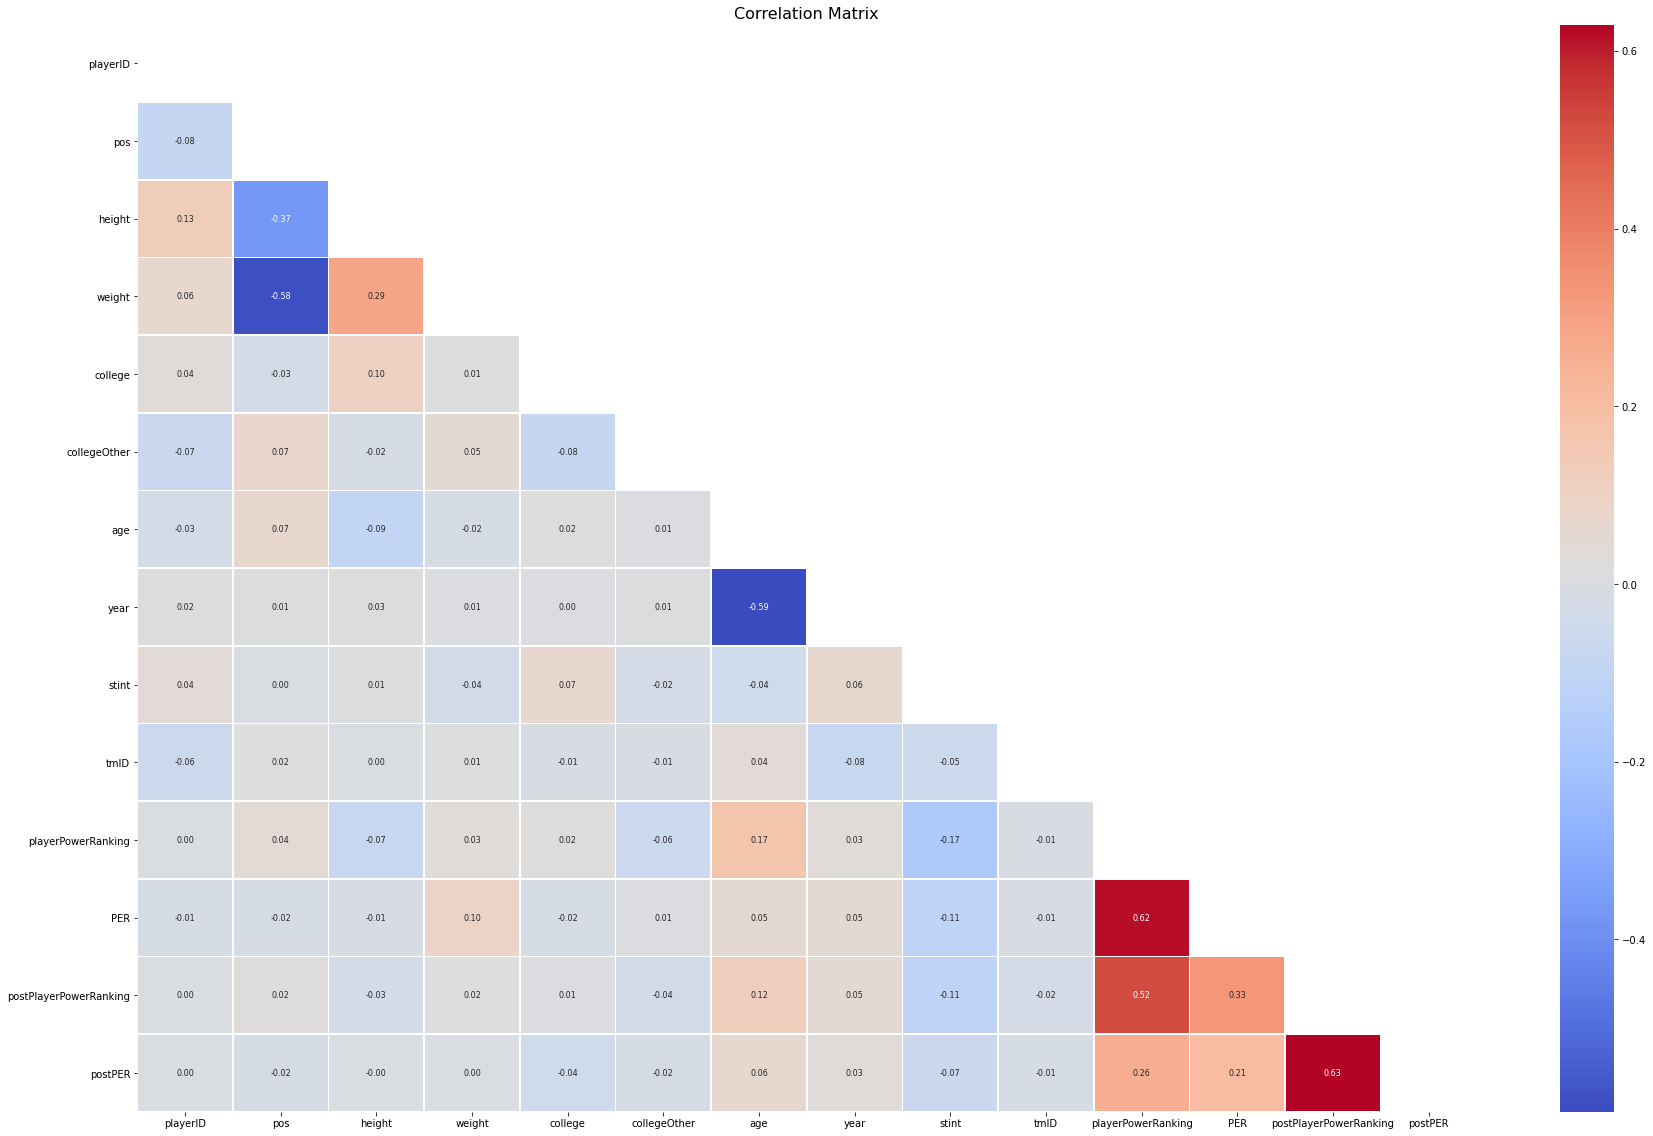

Correlation between target and playerID: 0.0017407573424106373
Correlation between target and pos: 0.04395862547682112
Correlation between target and height: -0.07460144972518805
Correlation between target and weight: 0.03073244198376407
Correlation between target and college: 0.022693003462659928
Correlation between target and collegeOther: -0.06056423250270007
Correlation between target and age: 0.17034178050919835
Correlation between target and year: 0.03255910353193643
Correlation between target and stint: -0.17224739122380459
Correlation between target and tmID: -0.010732987827324882
Correlation between target and playerPowerRanking: 1.0
Correlation between target and PER: 0.6185473825386631
Correlation between target and postPlayerPowerRanking: 0.52171047345388
Correlation between target and postPER: 0.25724876018074394


{'playerID': 0.0017407573424106373,
 'pos': 0.04395862547682112,
 'height': -0.07460144972518805,
 'weight': 0.03073244198376407,
 'college': 0.022693003462659928,
 'collegeOther': -0.06056423250270007,
 'age': 0.17034178050919835,
 'year': 0.03255910353193643,
 'stint': -0.17224739122380459,
 'tmID': -0.010732987827324882,
 'playerPowerRanking': 1.0,
 'PER': 0.6185473825386631,
 'postPlayerPowerRanking': 0.52171047345388,
 'postPER': 0.25724876018074394}

In [27]:
temp = merge_players_players_teams.copy()

for column in temp.columns:
    if temp[column].dtype == 'object':
        temp[column] = temp[column].astype('category').cat.codes

correlation_matrix(temp)

### Count relevants player awards in a year 

Awards considered relevant:
- Defensive Player of the Year
- Most Improved Player
- Most Valuable Player
- Rookie of the Year
- Sixth Woman of the Year
- WNBA Finals Most Valuable Player

In [28]:
# Filter relevant awards
relevant_awards = [
    "Defensive Player of the Year",
    "Most Improved Player",
    "Most Valuable Player",
    "Rookie of the Year",
    "Sixth Woman of the Year",
    "WNBA Finals Most Valuable Player",
]

filtered_awards = awards[awards['award'].isin(relevant_awards)]

# Group by playerID and year, count the number of awards
awards_count = filtered_awards.groupby(['playerID', 'year']).size().reset_index(name='countAwards')


# Merge players dataset with awards_count based on 'playerID' and 'year'
players_merged = pd.merge(merge_players_players_teams, awards_count, how='left', on=['playerID', 'year'])

# Fill NaN values in countAwards with 0
players_merged['countAwards'].fillna(0, inplace=True)

players_merged.to_csv('players_teams2.csv', index=False)

# Display the merged dataset
print(players_merged)


        playerID pos  height  weight      college collegeOther   age  year  \
0     abrossv01w   F    74.0     169  Connecticut          NaN  43.0     2   
1     abrossv01w   F    74.0     169  Connecticut          NaN  43.0     3   
2     abrossv01w   F    74.0     169  Connecticut          NaN  43.0     4   
3     abrossv01w   F    74.0     169  Connecticut          NaN  43.0     5   
4     abrossv01w   F    74.0     169  Connecticut          NaN  43.0     6   
...          ...  ..     ...     ...          ...          ...   ...   ...   
1871  zakalok01w   C    78.0     174          NaN          NaN  45.0     3   
1872   zarafr01w   G    70.0     146          NaN          NaN  47.0     6   
1873  zellosh01w   G    70.0     155   Pittsburgh          NaN  37.0    10   
1874  zirkozu01w   G    69.0     145          NaN          NaN  43.0     4   
1875   zollsh01w   G    67.0     148     Virginia          NaN  37.0     9   

      stint tmID  playerPowerRanking        PER  postPlayerPowe